In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/box1/'
buoyfile_filt = database + 'NATL60box1-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc'
wfile_filt = database + 'NATL60box1-CJM165_y2013m03d01.1d_vovecrtz_filt-n80-f0.0125.nc'
wbuoyfile_filt = database + 'NATL60box1-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc'
#wbuoyfile_filt2 = database + 'NATL60box1-CJM165_y2013m03d01.1d_wbuoy2_filt-n80-f0.0125.nc'

maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60box1-CJM165.1d_mask_filt-n80-f0.0125.nc'

In [4]:
dep=xr.open_dataset(buoyfile_filt)['deptht']
depw=xr.open_dataset(wfile_filt)['depthw']
depwb=xr.open_dataset(wbuoyfile_filt)['deptht']

In [5]:
buoy_box11=xr.open_dataset(buoyfile_filt)['sobuoy']
w_box11=xr.open_dataset(wfile_filt)['vovecrtz']
wbuoy_box11=xr.open_dataset(wbuoyfile_filt)['wbuoy']
#wbuoy2_box11=xr.open_dataset(wbuoyfile_filt2)['wbuoy']

In [6]:
mask=xr.open_dataset(maskfile)['tmask']

In [7]:
buoy_box11.shape

(1, 300, 758, 601)

In [8]:
w_box11.shape

(1, 300, 758, 601)

In [9]:
wbuoy_box11.shape

(1, 300, 758, 601)

In [10]:
wbuoy2_box11.shape

(1, 1, 953, 479)

In [10]:
mask.shape

(1, 300, 758, 601)

In [11]:
dep.shape

(300,)

In [12]:
depw.shape

(300,)

In [13]:
depwb.shape

(300,)

In [14]:
nav_lat=xr.open_dataset(buoyfile_filt)['nav_lat']
nav_lon=xr.open_dataset(buoyfile_filt)['nav_lon']
nav_latw=xr.open_dataset(wfile_filt)['nav_lat']
nav_lonw=xr.open_dataset(wfile_filt)['nav_lon']
nav_latwb=xr.open_dataset(wbuoyfile_filt)['nav_lat']
nav_lonwb=xr.open_dataset(wbuoyfile_filt)['nav_lon']
nav_latm=xr.open_dataset(maskfile)['nav_lat']
nav_lonm=xr.open_dataset(maskfile)['nav_lon']


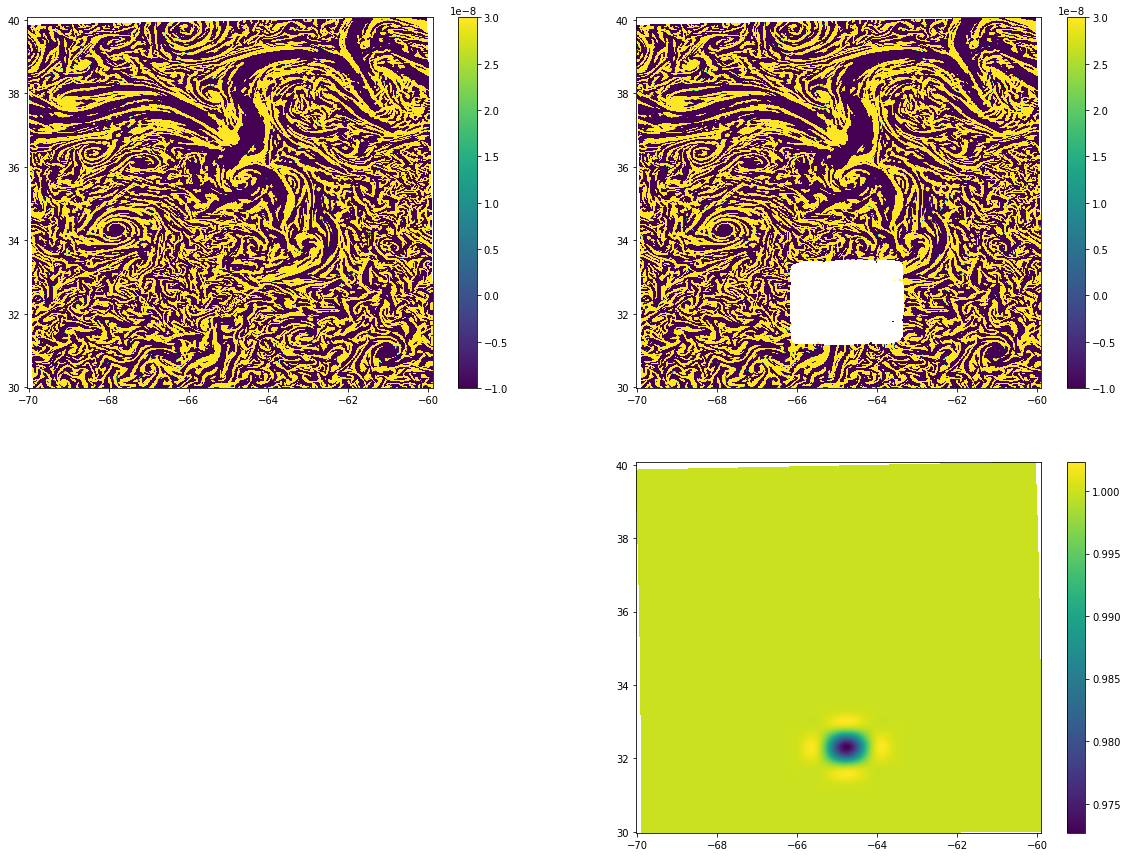

In [15]:
fig=plt.figure(figsize=(20,15))
plt.subplot(221)
plt.pcolormesh(nav_lon,nav_lat,buoy_box11[0,1,:,:]*w_box11[0,1,:,:]*mask[0,1,:,:],vmin=-1e-8,vmax=3e-8)
plt.colorbar()
plt.subplot(222)
plt.pcolormesh(nav_lonwb,nav_latwb,wbuoy_box11[0,1,:,:],vmin=-1e-8,vmax=3e-8)
plt.colorbar()
plt.subplot(224)
plt.pcolormesh(nav_lonm,nav_latm,mask[0,1,:,:])
plt.colorbar()


In [16]:
print np.mean(wbuoy_box11[0,1,:,:])

<xarray.DataArray 'wbuoy' ()>
array(-1.1961819978978383e-08)
Coordinates:
    deptht        float32 1.55879
    time_counter  datetime64[ns] 2013-03-01T12:01:04


In [17]:
print np.mean(buoy_box11[0,1,:,:]*w_box11[0,1,:,:]*mask[0,1,:,:])

<xarray.DataArray ()>
array(-1.2650798630886584e-08)
Coordinates:
    deptht        float32 1.55879
    depthw        float32 1.00003
    time_counter  datetime64[ns] 2013-09-30T12:00:00
